<span style="color:green; font-size:34px">Bike Sharing Case Study</span>


# Problem Statement


BoomBikes, a bike-sharing provider in the US, is facing revenue declines due to the COVID-19 pandemic. 
To recover, they aim to understand the demand for shared bikes post-lockdown and economic recovery. 
They want to identify factors influencing bike demand and build a predictive model. 
The objectives are:

- Identify significant variables predicting bike demand.
- Evaluate how well these variables describe bike demand.

The consulting company's task is to build a multiple linear regression model to achieve these objectives. 
The model will help BoomBikes prepare to meet post-lockdown demand effectively and distinguish themselves in the market for increased profitability.






In [411]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [412]:
# ignore warnings

import warnings
warnings.filterwarnings("ignore")

# Loading and Understanding the Data

In [413]:
# reading the data
bike=pd.read_csv("day.csv")

In [414]:
# Displaying the first 5 rows of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [415]:
# Displaying the shape of the dataset
bike.shape

(730, 16)

In [416]:
# Displaying descriptive information about the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [417]:
# Checking for missing values in the dataset
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [418]:
# Summary Statistics
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000



# Data Preprocessing

In [419]:
# Creating a column to analyze count trend over period
bike["month-year"]=bike["dteday"].apply(lambda x:x.split("-")[1]+"-"+x.split("-")[2])

In [420]:
# Dropping Unnecessary Columns
bike.drop(columns=["dteday","instant","casual","registered"],inplace=True)

In [421]:
# Mapping Non-Binary Categorical Columns to Original Values

bike["season"]= bike["season"].map({ 1:"spring", 2:"summer", 3:"fall", 4:"winter"})

bike["weathersit"]=bike["weathersit"].map({ 1: "Clear",2: "Cloudy", 3: "Light Rain",4: "Heavy Rain" })

bike["mnth"]=bike["mnth"].map({ 1:"Jan",2:"Feb", 3:"Mar",4:"Apr",5:"May", 6:"Jun", 7:"Jul", 8:"Aug",9:"Sep",10:"Oct",11:"Nov",
                               12:"Dec" })

bike["weekday"]=bike["weekday"].map({ 1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday",0:"Sunday"})

In [422]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month-year
0,spring,0,Jan,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985,01-2018
1,spring,0,Jan,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801,01-2018
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,01-2018
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,01-2018
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,01-2018


In [423]:
# replacing nan values with "Sunday"
bike["weekday"].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

# Exploratory Data Analysis (EDA)

## Univariate Analysis

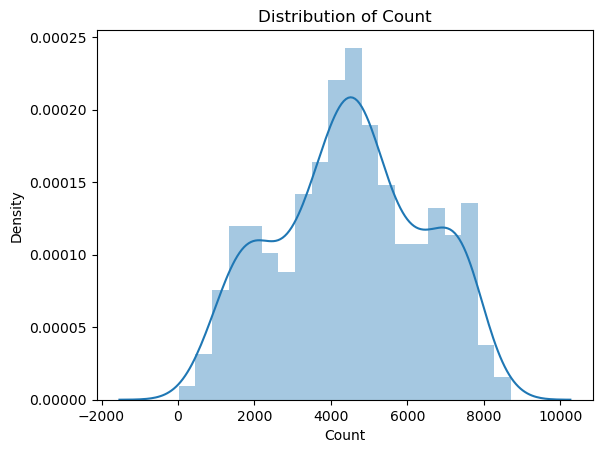

In [424]:
# Analysing the distribution in target variable "cnt"

sns.distplot(bike["cnt"], bins=20, kde=True)
plt.title('Distribution of Count')
plt.xlabel('Count')
plt.ylabel('Density')
plt.show()

The distribution of the target variable 'cnt' shows a peak between 4000 and 5000, indicating that a significant number of instances have a count of shared bikes within this range. This suggests that there is a common range of bike usage, potentially reflecting typical usage patterns or high-demand periods.

## Bivariate Analysis: Exploring Relationships with the Target Variable "cnt"

### "month-year" vs "cnt"
###### Analysing the trend over period




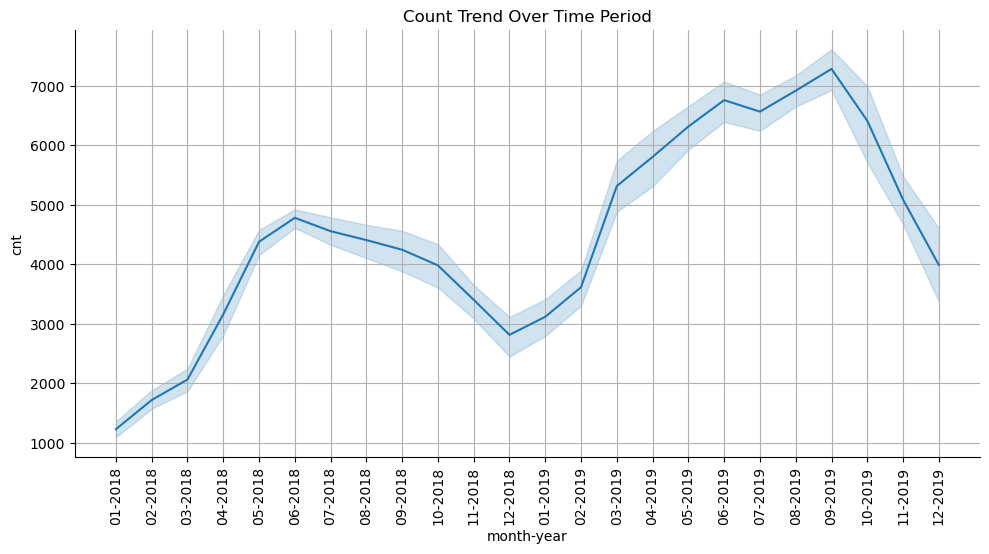

In [425]:
sns.relplot(x="month-year", y="cnt", data=bike, kind="line", height=5, aspect=2)
plt.title('Count Trend Over Time Period')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In the line chart, we can observe a significant surge in the demand for shared bikes in 2019 compared to 2018. The peak demand appears to have occurred in September 2019. However, following this peak, there has been a consistent decrease. It's plausible that the ongoing COVID-19 pandemic could be one of the main factors contributing to this decline.

### "season" vs "cnt"

###### Analyzing the Impact of Season on Bike Demand


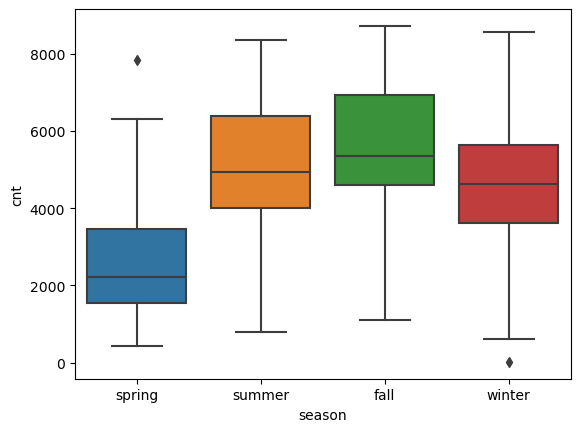

In [426]:
sns.boxplot(x="season",y="cnt",data=bike)
plt.show()

The insight reveals a clear seasonal pattern in bike demand, with autumn (fall) exhibiting the highest demand and spring showing the lowest.

It's noticed that more people want to ride bikes during autumn, when the weather is nice and the trees are colorful. Spring, on the other hand, has less bike riding because it's still a bit cold and not as pretty outside.

### "holiday" vs "cnt"

###### Analyzing the Impact of Holidays on Bike Demand

- 0 typically represents a regular day, meaning it's not a holiday.
- 1 represents a holiday, indicating that it's a special day or public holiday.


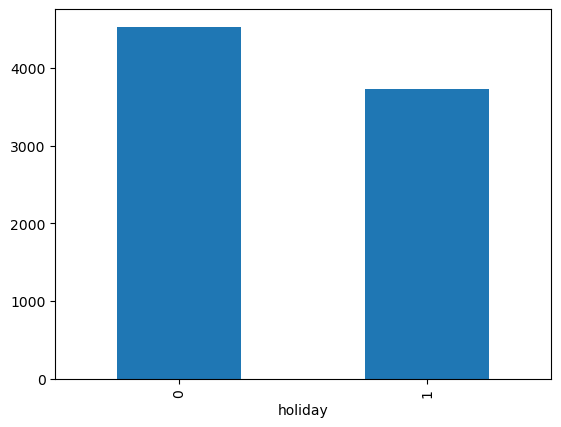

In [427]:
bike.groupby("holiday")["cnt"].mean().plot.bar()
plt.show()

Surprisingly,analysis reveals that bike usage tends to be higher on regular days compared to holidays. 
This unexpected finding suggests that factors other than holidays may play a significant role in influencing bike demand. 

### "mnth" vs "cnt"

###### Analyzing How Month Influences Bike Demand

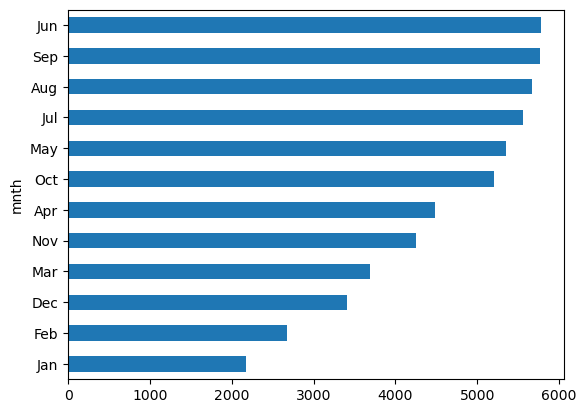

In [428]:
bike.groupby("mnth")["cnt"].mean().sort_values().plot.barh()
plt.show()

During the Summer and Autumn months i.e months from June to October, more people tend to use bikes, while demand decreases in the colder months from December to March. This shows that weather plays a big role in how many bikes are used.

### "weathersit" vs "cnt"
###### Analyzing the Impact of Weather Situation on Bike Demand

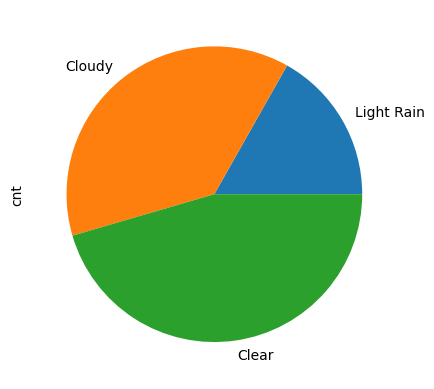

In [429]:
bike.groupby("weathersit")["cnt"].mean().sort_values().plot.pie()
plt.show()

We noticed that more people prefer to ride bikes when the weather is clear or partly cloudy, with few clouds in the sky. These conditions seem to be the most favorable for biking, leading to higher demand for shared bikes.

# Machine Learning

In [430]:
# importing all necessary libraries

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [431]:
# Again loading the dataset to facilitate machine learning analysis.

In [432]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month-year
0,spring,0,Jan,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985,01-2018
1,spring,0,Jan,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801,01-2018
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,01-2018
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,01-2018
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,01-2018


In [433]:
# Dropping the column "month-year" as it's not needed for ML model building
bike.drop(["month-year"],axis=1,inplace=True)

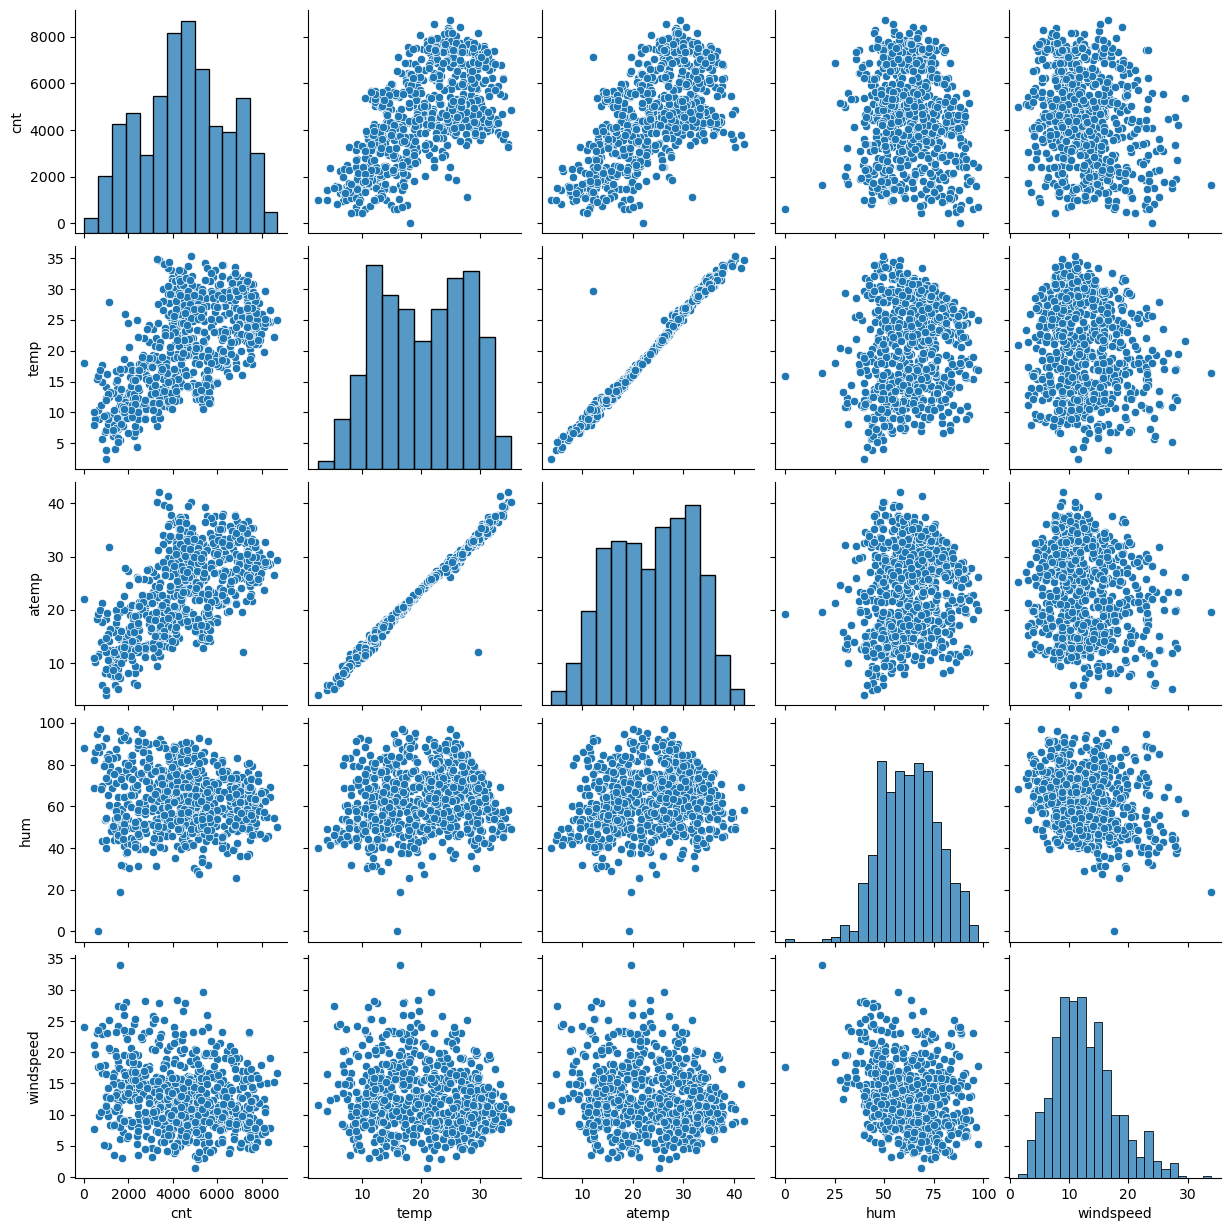

In [434]:
# Visualizing the numerical variables using pairplot

sns.pairplot(bike[["cnt","temp","atemp","hum","windspeed"]])
plt.show()

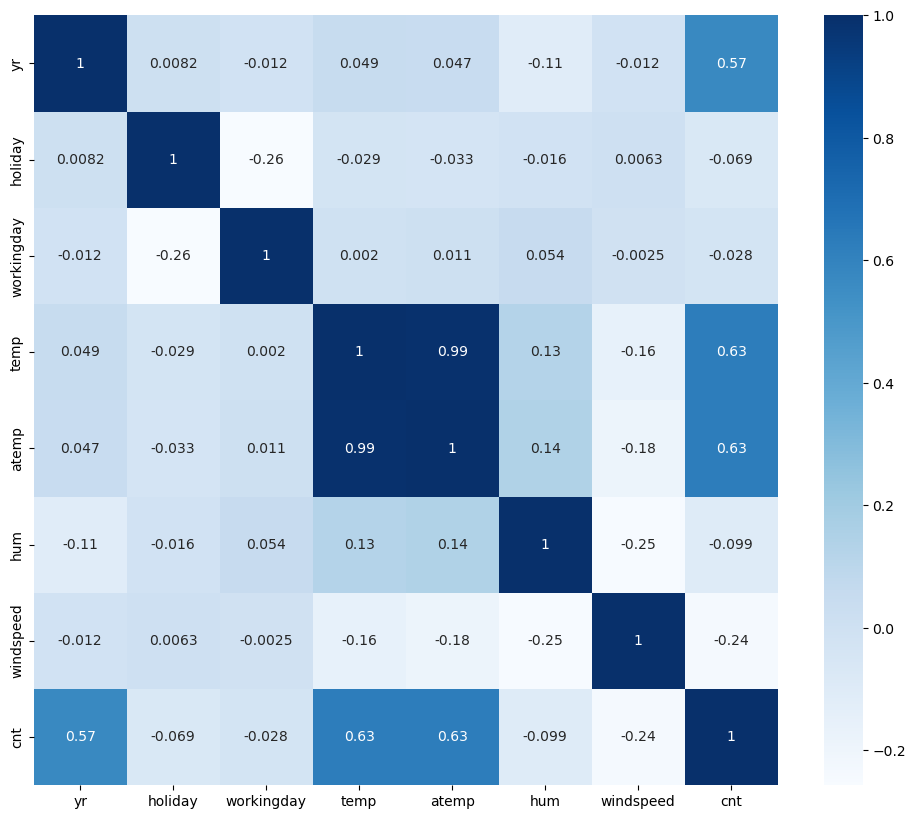

In [435]:
# Exploring Correlations with Heatmap

plt.figure(figsize=(12,10))
sns.heatmap(bike.corr(),annot=True,cmap="Blues")
plt.show()

# Preparing the Data for Modelling

#### Encoding

In [436]:
# We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

In [437]:
# 'season'

df_dummy=pd.get_dummies(bike["season"],drop_first=True)
bike=pd.concat([bike,df_dummy],axis=1)
bike.drop(columns=["season"],inplace=True)

# 'mnth'

df_dummy=pd.get_dummies(bike["mnth"],drop_first=True)
bike=pd.concat([bike,df_dummy],axis=1)
bike.drop(columns=["mnth"],inplace=True)

# 'weekday'

df_dummy=pd.get_dummies(bike["weekday"],drop_first=True)
bike=pd.concat([bike,df_dummy],axis=1)
bike.drop(columns=["weekday"],inplace=True)

# 'weathersit'

df_dummy=pd.get_dummies(bike["weathersit"],drop_first=True)
bike=pd.concat([bike,df_dummy],axis=1)
bike.drop(columns=["weathersit"],inplace=True)

In [438]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Rain
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [439]:
# checking new shape

bike.shape

(730, 30)

#### train-test split

In [440]:
df_train,df_test=train_test_split(bike,train_size=0.7,random_state=333)

#### Rescaling the Features

In [441]:
scaler=MinMaxScaler()

In [442]:
num_vars=["temp","atemp","hum","windspeed","cnt"]

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_test[num_vars]=scaler.transform(df_test[num_vars])

#### Splitting into X_train,y_train,X_test,y_test

In [443]:
X_train=df_train.drop(columns=["cnt"],axis=1)
y_train=df_train["cnt"]
X_test=df_test.drop(columns=["cnt"],axis=1)
y_test=df_test["cnt"]

# Training the Model

We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

# <span style="color: #008000; background-color: #00FF00;">Model 1</span>


### RFE

In [444]:
# Running RFE with the output variables equal to 15

lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(estimator=lm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [445]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 8),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', True, 1),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 2),
 ('Thursday', False, 15),
 ('Tuesday', False, 7),
 ('Wednesday', False, 11),
 ('Cloudy', True, 1),
 ('Light Rain', True, 1)]

In [446]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'spring', 'winter', 'Dec',
       'Jul', 'Mar', 'Nov', 'Sep', 'Saturday', 'Cloudy', 'Light Rain'],
      dtype='object')

In [447]:
X_train.columns[~ rfe.support_]

Index(['holiday', 'workingday', 'summer', 'Aug', 'Feb', 'Jan', 'Jun', 'May',
       'Oct', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

##### Building model using statsmodels for the detail statistics

In [448]:
X_train_rfe=X_train[col]

In [449]:
# adding a constant variable
X_train_rfe_sm=sm.add_constant(X_train_rfe)

# create a first model and fit

lr_1=sm.OLS(y_train,X_train_rfe_sm).fit()

# params

lr_1.params

# summary

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     168.9
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          2.15e-183
Time:                        17:38:30   Log-Likelihood:                 501.85
No. Observations:                 510   AIC:                            -971.7
Df Residuals:                     494   BIC:                            -903.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3602      0.033     10.841      0.000       0.295       0.425
yr             0.2285      0.008     27.575      0.000       0.212       0.245
temp           0.2979      0.131      2.268      0.024       0.040       0.556
atemp          0.1657      0.138      1.203      0.229      -0.105       0.436
hum           -0.1667      0.038     -4.372      0.000      -0.242      -0.092
windspeed     -0.1800      0.028     -6.365      0.000      -0.236      -0.124
spring        -0.1239      0.015     -7.999      0.000      -0.154      -0.093
winter         0.0770      0.014      5.391      0.000       0.049       0.105
Dec           -0.0411      0.017     -2.351      0.019      -0.075      -0.007
Jul           -0.0512      0.017     -2.958      0.003      -0.085      -0.017
Mar            0.0454      0.016      2.805      0.005       0.014       0.077
Nov           -0.0586      0.019     -3.093      0.002      -0.096      -0.021
Sep            0.0625      0.016      3.982      0.000       0.032       0.093
Saturday       0.0208      0.012      1.762      0.079      -0.002       0.044
Cloudy        -0.0485      0.011     -4.471      0.000      -0.070      -0.027
Light Rain    -0.2641      0.029     -9.178      0.000      -0.321      -0.208
==============================================================================
Omnibus:                       75.936   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.494
Skew:                          -0.784   Prob(JB):                     4.73e-39
Kurtosis:                       5.418   Cond. No.                         76.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Checking Vifs

In [450]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,357.78
2,atemp,354.14
3,hum,22.92
4,windspeed,5.12
6,winter,2.76
5,spring,2.69
13,Cloudy,2.28
0,yr,2.05
10,Nov,1.83
8,Jul,1.42


As the variable "atemp" has significantly high p-value i.e 0.229 as well as high VIF 354.14 .Therefore,this variable
is not of much use and should be dropped.

# <span style="color: #008000; background-color: #00FF00;">Model 2</span>

#### Dropping the variable "atemp" and updating the model

In [451]:
X_train_new=X_train_rfe.drop(columns=["atemp"],axis=1)

In [452]:
# adding a constant variable
X_train_sm=sm.add_constant(X_train_new)

# create a first model and fit

lr_2=sm.OLS(y_train,X_train_sm).fit()

# params

lr_2.params

# summary

lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     180.7
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          3.22e-184
Time:                        17:38:30   Log-Likelihood:                 501.10
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     495   BIC:                            -908.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3635      0.033     10.972      0.000       0.298       0.429
yr             0.2285      0.008     27.567      0.000       0.212       0.245
temp           0.4511      0.032     14.004      0.000       0.388       0.514
hum           -0.1644      0.038     -4.314      0.000      -0.239      -0.090
windspeed     -0.1858      0.028     -6.665      0.000      -0.241      -0.131
spring        -0.1243      0.015     -8.023      0.000      -0.155      -0.094
winter         0.0783      0.014      5.497      0.000       0.050       0.106
Dec           -0.0411      0.017     -2.353      0.019      -0.076      -0.007
Jul           -0.0514      0.017     -2.969      0.003      -0.085      -0.017
Mar            0.0463      0.016      2.864      0.004       0.015       0.078
Nov           -0.0591      0.019     -3.124      0.002      -0.096      -0.022
Sep            0.0614      0.016      3.920      0.000       0.031       0.092
Saturday       0.0194      0.012      1.651      0.099      -0.004       0.042
Cloudy        -0.0488      0.011     -4.502      0.000      -0.070      -0.028
Light Rain    -0.2653      0.029     -9.220      0.000      -0.322      -0.209
==============================================================================
Omnibus:                       74.092   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.965
Skew:                          -0.767   Prob(JB):                     4.55e-38
Kurtosis:                       5.396   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Checking Vifs

In [453]:
# Create the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,22.50
1,temp,15.96
3,windspeed,5.01
5,winter,2.73
4,spring,2.69
12,Cloudy,2.27
0,yr,2.05
9,Nov,1.83
7,Jul,1.42
6,Dec,1.41


Dropping variable "hum" on the basis of high VIF.

# <span style="color: #008000; background-color: #00FF00;">Model 3</span>

#### Dropping the variable "hum" and updating the model

In [454]:
X_train_new=X_train_new.drop(columns=["hum"],axis=1)

In [455]:
# adding a constant variable
X_train_sm=sm.add_constant(X_train_new)

# create a first model and fit

lr_3=sm.OLS(y_train,X_train_sm).fit()

# params

lr_3.params

# summary

lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.6
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          2.05e-181
Time:                        17:38:30   Log-Likelihood:                 491.69
No. Observations:                 510   AIC:                            -955.4
Df Residuals:                     496   BIC:                            -896.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2710      0.026     10.545      0.000       0.220       0.321
yr             0.2326      0.008     27.767      0.000       0.216       0.249
temp           0.4220      0.032     13.167      0.000       0.359       0.485
windspeed     -0.1519      0.027     -5.580      0.000      -0.205      -0.098
spring        -0.1261      0.016     -7.999      0.000      -0.157      -0.095
winter         0.0726      0.014      5.032      0.000       0.044       0.101
Dec           -0.0504      0.018     -2.852      0.005      -0.085      -0.016
Jul           -0.0442      0.018     -2.518      0.012      -0.079      -0.010
Mar            0.0519      0.016      3.165      0.002       0.020       0.084
Nov           -0.0591      0.019     -3.066      0.002      -0.097      -0.021
Sep            0.0565      0.016      3.551      0.000       0.025       0.088
Saturday       0.0223      0.012      1.868      0.062      -0.001       0.046
Cloudy        -0.0762      0.009     -8.524      0.000      -0.094      -0.059
Light Rain    -0.3143      0.027    -11.682      0.000      -0.367      -0.261
==============================================================================
Omnibus:                       74.191   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.272
Skew:                          -0.766   Prob(JB):                     2.37e-38
Kurtosis:                       5.410   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Checking VIFs

In [456]:
# Create the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.21
2,windspeed,4.97
4,winter,2.35
0,yr,2.05
3,spring,1.90
8,Nov,1.80
11,Cloudy,1.54
6,Jul,1.38
5,Dec,1.34
7,Mar,1.22


# <span style="color: #008000; background-color: #00FF00;">Model 4</span>

#### Dropping the variable "Saturday" and updating the model

In [457]:
X_train_new=X_train_new.drop(columns=["Saturday"],axis=1)

In [458]:
# adding a constant variable
X_train_sm=sm.add_constant(X_train_new)

# create a first model and fit

lr_4=sm.OLS(y_train,X_train_sm).fit()

# params

lr_4.params

# summary

lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.8
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          7.99e-182
Time:                        17:38:30   Log-Likelihood:                 489.90
No. Observations:                 510   AIC:                            -953.8
Df Residuals:                     497   BIC:                            -898.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2729      0.026     10.602      0.000       0.222       0.323
yr             0.2330      0.008     27.757      0.000       0.217       0.250
temp           0.4238      0.032     13.193      0.000       0.361       0.487
windspeed     -0.1520      0.027     -5.570      0.000      -0.206      -0.098
spring        -0.1268      0.016     -8.026      0.000      -0.158      -0.096
winter         0.0721      0.014      4.985      0.000       0.044       0.101
Dec           -0.0494      0.018     -2.792      0.005      -0.084      -0.015
Jul           -0.0463      0.018     -2.636      0.009      -0.081      -0.012
Mar            0.0542      0.016      3.307      0.001       0.022       0.086
Nov           -0.0581      0.019     -3.008      0.003      -0.096      -0.020
Sep            0.0561      0.016      3.518      0.000       0.025       0.087
Cloudy        -0.0755      0.009     -8.425      0.000      -0.093      -0.058
Light Rain    -0.3121      0.027    -11.582      0.000      -0.365      -0.259
==============================================================================
Omnibus:                       74.800   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.646
Skew:                          -0.772   Prob(JB):                     1.19e-38
Kurtosis:                       5.416   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIFs

In [459]:
# Create the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.12
2,windspeed,4.97
4,winter,2.35
0,yr,2.04
3,spring,1.90
8,Nov,1.80
10,Cloudy,1.53
6,Jul,1.37
5,Dec,1.34
7,Mar,1.21


# <span style="color: #008000; background-color: #00FF00;">Model 5</span>

#### Dropping the variable "windspeed" and updating the model.

In [460]:
X_train_new=X_train_new.drop(columns=["windspeed"],axis=1)

In [461]:
# adding a constant variable
X_train_sm=sm.add_constant(X_train_new)

# create a first model and fit

lr_5=sm.OLS(y_train,X_train_sm).fit()

# params

lr_5.params

# summary

lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     204.0
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          1.75e-176
Time:                        17:38:30   Log-Likelihood:                 474.46
No. Observations:                 510   AIC:                            -924.9
Df Residuals:                     498   BIC:                            -874.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2072      0.024      8.795      0.000       0.161       0.253
yr             0.2306      0.009     26.709      0.000       0.214       0.248
temp           0.4421      0.033     13.439      0.000       0.377       0.507
spring        -0.1268      0.016     -7.796      0.000      -0.159      -0.095
winter         0.0850      0.015      5.779      0.000       0.056       0.114
Dec           -0.0438      0.018     -2.410      0.016      -0.080      -0.008
Jul           -0.0398      0.018     -2.207      0.028      -0.075      -0.004
Mar            0.0540      0.017      3.196      0.001       0.021       0.087
Nov           -0.0639      0.020     -3.217      0.001      -0.103      -0.025
Sep            0.0626      0.016      3.823      0.000       0.030       0.095
Cloudy        -0.0735      0.009     -7.974      0.000      -0.092      -0.055
Light Rain    -0.3281      0.028    -11.894      0.000      -0.382      -0.274
==============================================================================
Omnibus:                       77.419   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.169
Skew:                          -0.781   Prob(JB):                     8.36e-42
Kurtosis:                       5.542   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Checking VIFs

In [462]:
# Create the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.86
3,winter,2.35
0,yr,2.03
7,Nov,1.75
9,Cloudy,1.53
2,spring,1.43
4,Dec,1.34
5,Jul,1.34
6,Mar,1.21
8,Sep,1.21


Now, as we can see, both the Variance Inflation Factors (VIFs) and the p-values are within an acceptable range. Therefore, we confidently declare that the fifth model (lr_5) is our ultimate choice.

We're ready to confidently make predictions using the lr_5 model.

# Residual Analysis

In [463]:
y_train_pred=lr_5.predict(X_train_sm)

In [464]:
res=y_train-y_train_pred

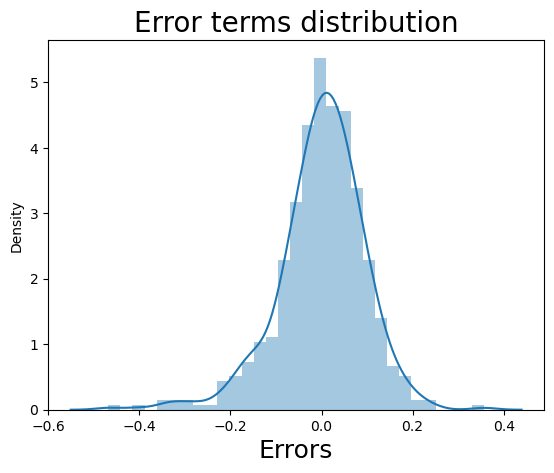

In [465]:
# Error Terms Distribution Plot

sns.distplot(res)
plt.title("Error terms distribution",fontsize=20)
plt.xlabel("Errors",fontsize=18)
plt.show()

# Making Predictions Using the Final Model

In [466]:
# Creating X_test_new dataframe by selecting the variables that were part of final model.
X_test_new=X_test[['yr', 'temp', 'spring', 'winter', 'Dec', 'Jul', 'Mar', 'Nov', 'Sep', 'Cloudy', 'Light Rain']]

In [467]:
# Adding constant variable to test dataframe
X_test_sm=sm.add_constant(X_test_new)

# Making Predictions on Test Data Using our final Model
y_test_pred=lr_5.predict(X_test_sm)

# Model Evaluation

In [468]:
# evaluation of model using r2_score on test data
r2_score(y_test,y_test_pred)

0.8246849699681744

In [469]:
# evaluation of model using r2_score on train data
r2_score(y_train,y_train_pred)

0.8183513323728271

In [470]:
# Adjusted R^2 Value for test set

# We already have the value of R^2 (calculated in above step)
r2=0.8246849699681744

# Get the shape of X_test
X_test_new.shape

# n is number of rows in X
n = X_test_new.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.815413502033799

Text(0, 0.5, 'y_test_pred')

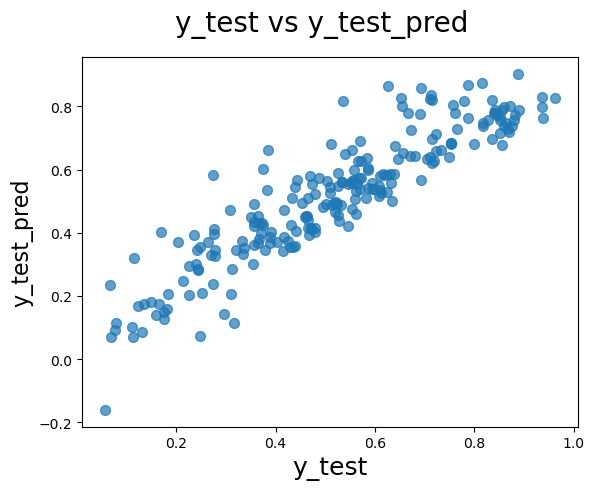

In [471]:
# Let's now plot the graph for actual versus predicted values to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred,alpha=0.7,s=50)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                               # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

We can say that what the model has learn on training set,model is able to generalise on test set as well

# <span style="color: #008000; background-color: #00FF00;">Final Result Comparison</span>

- Train R^2 :0.818
- Train Adjusted R^2 :0.814
- Test R^2 :0.824
- Test Adjusted R^2 :0.815

# Interpreting the Results

We can see that the equation of our best fitted line is:
    
$ cnt = 0.2306 \times  yr + 0.4421  \times  temp - 0.1268\times Spring + 0.0850 \times Winter- 0.0438 \times Dec - 0.0398 \times Jul + 0.0540 \times Mar - 0.0639\times Nov + 0.0626\times Sep - 0.0735 \times Cloudy - 0.3281 \times Light Rain $


As per our final Model, the top 3 predictor variables that influences the bike booking are:

 - 1.  Temperature (temp): With a coefficient of 0.4421, temperature has the highest positive impact on bike counts (cnt). An     increase in temperature leads to a greater increase in bike hires compared to other predictors.A one-unit increase in temperature leads to a 0.4421-unit increase in bike hires.
   

- 2.  Year (yr): Year also has a significant positive impact on bike counts, with a coefficient of 0.2306. This suggests that bike hires tend to increase over the years.The coefficient value of 0.2306 indicates that for each additional year, the bike hire numbers increase by 0.2306 units.


- 3.   Light Rain (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds): Despite having a negative coefficient of -0.3281, the 'LightRain' variable, which encompasses weather conditions such as light snow, light rain with thunderstorms, and scattered clouds, has a significant impact on bike counts. This variable exhibits the highest negative influence among the predictors, indicating that a one-unit increase in the 'LightRain' variable results in a decrease of 0.3281 units in bike hire numbers

